In [1]:
import datetime
now = datetime.datetime.now()
print ("Current date and time: ")
print (now.strftime("%Y-%m-%d %H:%M:%S"))

Current date and time: 
2022-07-31 18:09:30


In [2]:
# installing dependencies
#
import pandas as pd
import os
import seaborn as sns
import numpy as np
import datetime
import matplotlib.pyplot as plt
import matplotlib as mpl
import geopandas as gpd

#### ECOSTRESS EVAPOTRANSPIRATION FROM APPEARS WEBSITE

### JJA 2019

##### Read in ECO3ETPTJPL-001-Statistics.csv

In [3]:
# read in CSV file
#
ET_stats_S19 = pd.read_csv ("ECO3ETPTJPL-001-Statistics_S2019.csv", index_col='Date', parse_dates=True)
pd.set_option('display.max_columns', None)
ET_stats_S19.head()

,File Name,Dataset,aid,Orbit Number,Scene ID,Build ID,Orbit Correction Performed,Count,Minimum,Maximum,Range,Mean,Standard Deviation,Variance,Upper Quartile,Upper 1.5 IQR,Median,Lower 1.5 IQR,Lower Quartile,Unnamed: 20,Abs Mean,Z score
Date,,,,,,,,,,,,,,,,,,,,,,
2019-06-03 07:51:35+00:00,ECO3ETPTJPL_001_EVAPOTRANSPIRATION_PT_JPL_ETda...,EVAPOTRANSPIRATION_PT_JPL_ETdaily,aid0001,5153,8,601,True,796875,0.191603,310.142761,"(0.1916026,310.1427612)",26.772724,29.829147,889.778031,27.486214,45.823162,20.257069,0.191603,15.261210,NaN,NaN,NaN
2019-06-03 07:52:27+00:00,ECO3ETPTJPL_001_EVAPOTRANSPIRATION_PT_JPL_ETda...,EVAPOTRANSPIRATION_PT_JPL_ETdaily,aid0001,5153,9,601,True,11427570,0.237342,323.500458,"(0.2373419,323.5004578)",43.622532,33.331768,1111.006760,48.937714,82.238144,36.358467,0.237342,26.737290,NaN,NaN,NaN
2019-06-03 12:41:52+00:00,ECO3ETPTJPL_001_EVAPOTRANSPIRATION_PT_JPL_ETda...,EVAPOTRANSPIRATION_PT_JPL_ETdaily,aid0001,5156,11,601,True,12628012,1.118135,532.455017,"(1.1181346,532.4550171)",79.574341,52.729233,2780.371990,102.739599,188.700836,72.068329,1.118135,45.432017,NaN,NaN,NaN
2019-06-03 12:42:44+00:00,ECO3ETPTJPL_001_EVAPOTRANSPIRATION_PT_JPL_ETda...,EVAPOTRANSPIRATION_PT_JPL_ETdaily,aid0001,5156,12,601,True,27532471,16.067795,1425.663330,"(16.0677948,1425.6633301)",168.113068,119.373070,14249.929780,205.276504,378.955048,137.239853,16.067795,89.490791,NaN,NaN,NaN
2019-06-05 07:48:18+00:00,ECO3ETPTJPL_001_EVAPOTRANSPIRATION_PT_JPL_ETda...,EVAPOTRANSPIRATION_PT_JPL_ETdaily,aid0001,5184,6,601,True,1910356,0.057624,424.024567,"(0.0576237,424.0245667)",2.718432,13.765628,189.492510,2.047316,4.822991,0.549358,0.057624,0.196829,NaN,NaN,NaN


In [4]:
ET_stats_S19.dtypes

File Name                      object
Dataset                        object
aid                            object
Orbit Number                    int64
Scene ID                        int64
Build ID                        int64
Orbit Correction Performed       bool
Count                           int64
Minimum                       float64
Maximum                       float64
Range                          object
Mean                          float64
Standard Deviation            float64
Variance                      float64
Upper Quartile                float64
Upper 1.5 IQR                 float64
Median                        float64
Lower 1.5 IQR                 float64
Lower Quartile                float64
Unnamed: 20                   float64
Abs Mean                      float64
Z score                       float64
dtype: object

In [5]:
mean_S19 = ET_stats_S19['Mean']
mean_S19

Date
2019-06-03 07:51:35+00:00      26.772724
2019-06-03 07:52:27+00:00      43.622532
2019-06-03 12:41:52+00:00      79.574341
2019-06-03 12:42:44+00:00     168.113068
2019-06-05 07:48:18+00:00       2.718432
                                ...     
2019-08-30 22:15:06+00:00    1104.073731
2019-08-30 22:15:57+00:00     367.968292
2019-08-30 23:52:44+00:00      87.154427
2019-08-31 01:30:13+00:00     173.373779
2019-08-31 01:31:05+00:00     181.735123
Name: Mean, Length: 283, dtype: float64

In [6]:
mean_S19 = pd.DataFrame(mean_S19)
mean_S19

,Mean
Date,
2019-06-03 07:51:35+00:00,26.772724
2019-06-03 07:52:27+00:00,43.622532
2019-06-03 12:41:52+00:00,79.574341
2019-06-03 12:42:44+00:00,168.113068
2019-06-05 07:48:18+00:00,2.718432
...,...
2019-08-30 22:15:06+00:00,1104.073731
2019-08-30 22:15:57+00:00,367.968292
2019-08-30 23:52:44+00:00,87.154427


<AxesSubplot:xlabel='Date'>

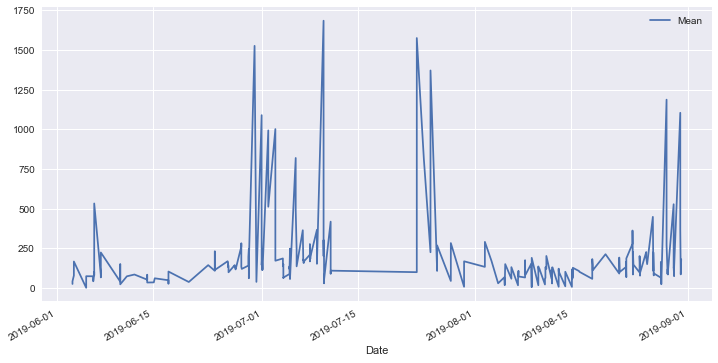

In [7]:
plt.style.use('seaborn')
mean_S19.plot(figsize= (12, 6))

In [8]:
mean_S19.to_csv('mean_S2019.csv')
print('new csv file was created... ')

new csv file was created... 


<AxesSubplot:xlabel='Date'>

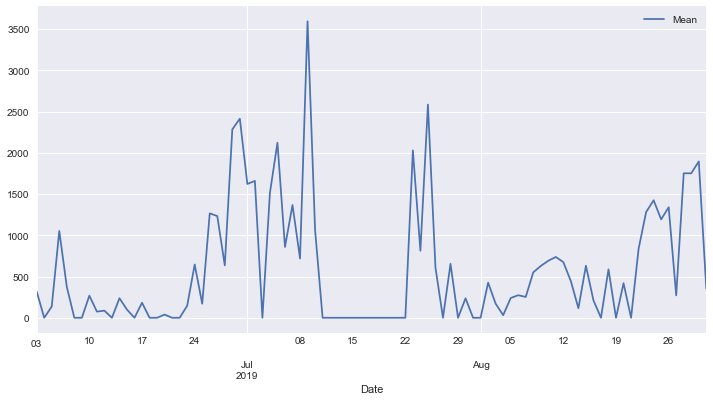

In [22]:
#Daily sum of means
mean_S19.resample('D').sum().plot(figsize= (12, 6))

<AxesSubplot:xlabel='Date'>

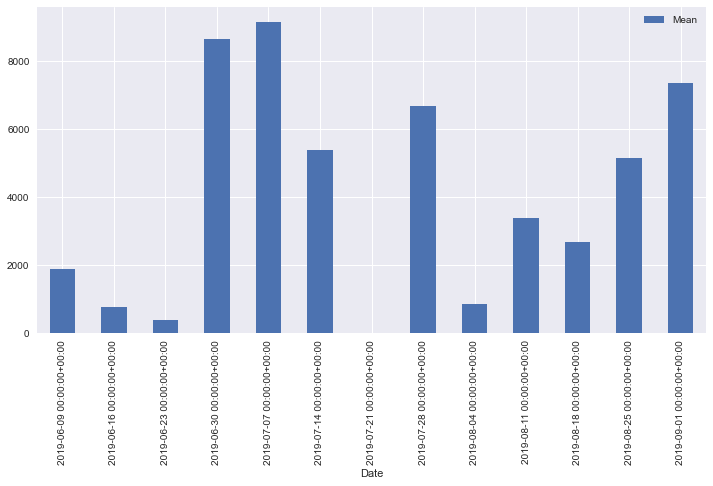

In [30]:
mean_S19.resample('W').sum().plot(figsize= (12, 6), kind='bar')

<AxesSubplot:xlabel='Date'>

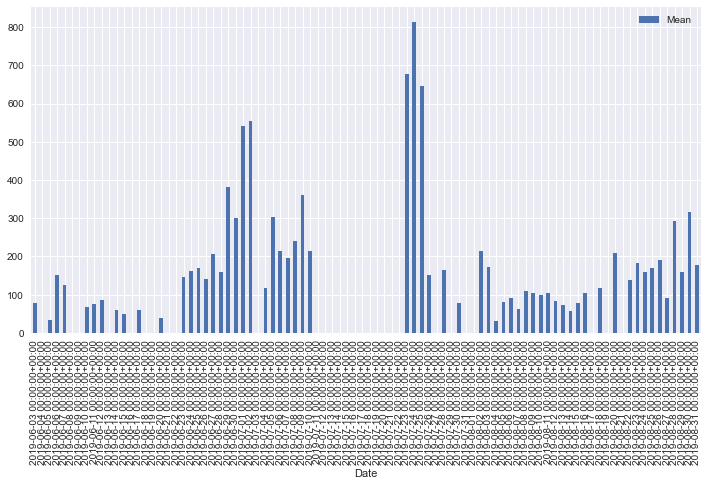

In [28]:
mean_S19.resample('D').mean().plot(figsize= (12, 6), kind='bar')

---

<AxesSubplot:xlabel='Date'>

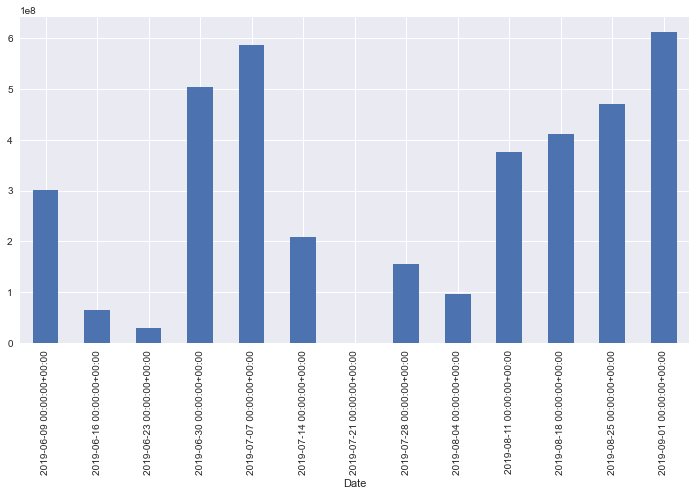

In [35]:
ET_stats_S19['Count'].resample('W').sum().plot(figsize= (12, 6), kind='bar')

<AxesSubplot:xlabel='time'>

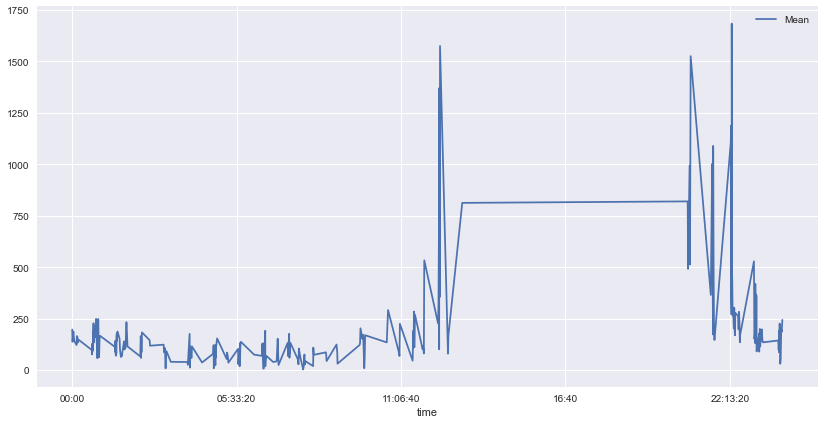

In [44]:
mean_S19.groupby(mean_S19.index.time).mean().plot(figsize= (14, 7))

In [47]:
pivoted_mean = mean_S19.pivot_table('Mean', index=mean_S19.index.time, columns=mean_S19.index.date)
pivoted_mean

,2019-06-03,2019-06-05,2019-06-06,2019-06-07,2019-06-10,2019-06-11,2019-06-12,2019-06-14,2019-06-15,2019-06-17,2019-06-20,2019-06-23,2019-06-24,2019-06-25,2019-06-26,2019-06-27,2019-06-28,2019-06-29,2019-06-30,2019-07-01,2019-07-02,2019-07-04,2019-07-05,2019-07-06,2019-07-07,2019-07-08,2019-07-09,2019-07-10,2019-07-23,2019-07-24,2019-07-25,2019-07-26,2019-07-28,2019-07-30,2019-08-02,2019-08-03,2019-08-04,2019-08-05,2019-08-06,2019-08-07,2019-08-08,2019-08-09,2019-08-10,2019-08-11,2019-08-12,2019-08-13,2019-08-14,2019-08-15,2019-08-16,2019-08-18,2019-08-20,2019-08-22,2019-08-23,2019-08-24,2019-08-25,2019-08-26,2019-08-27,2019-08-28,2019-08-29,2019-08-30,2019-08-31
00:00:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,196.791,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:00:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,137.444992,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:02:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,187.378571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:03:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,166.510300,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:04:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,141.527283,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23:55:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,30.676386,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23:56:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,51.632465,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23:57:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,199.601440,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23:58:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,185.552582,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='time'>

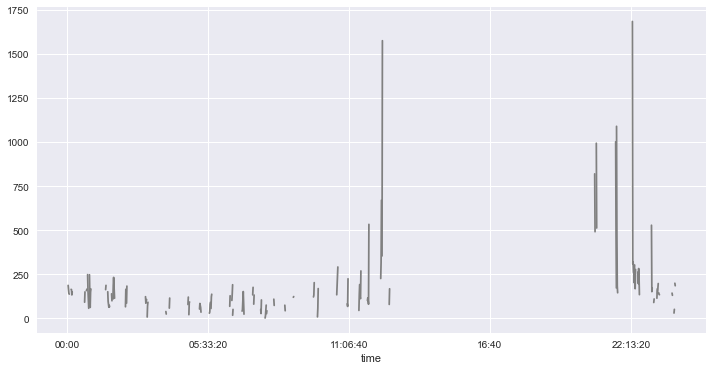

In [56]:
pivoted_mean.plot(legend=False,figsize= (12, 6), color='grey')

In [45]:
pivoted_count = ET_stats_S19.pivot_table('Count', index=ET_stats_S19.index.time, columns=ET_stats_S19.index.date)
pivoted_count

,2019-06-03,2019-06-05,2019-06-06,2019-06-07,2019-06-10,2019-06-11,2019-06-12,2019-06-14,2019-06-15,2019-06-17,2019-06-20,2019-06-23,2019-06-24,2019-06-25,2019-06-26,2019-06-27,2019-06-28,2019-06-29,2019-06-30,2019-07-01,2019-07-02,2019-07-04,2019-07-05,2019-07-06,2019-07-07,2019-07-08,2019-07-09,2019-07-10,2019-07-23,2019-07-24,2019-07-25,2019-07-26,2019-07-28,2019-07-30,2019-08-02,2019-08-03,2019-08-04,2019-08-05,2019-08-06,2019-08-07,2019-08-08,2019-08-09,2019-08-10,2019-08-11,2019-08-12,2019-08-13,2019-08-14,2019-08-15,2019-08-16,2019-08-18,2019-08-20,2019-08-22,2019-08-23,2019-08-24,2019-08-25,2019-08-26,2019-08-27,2019-08-28,2019-08-29,2019-08-30,2019-08-31
00:00:04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,253545.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:00:41,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,44113072.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:02:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,8696451.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:03:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5087475.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
00:04:12,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,14125420.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23:55:26,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,17544.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23:56:18,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3157176.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23:57:28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36857744.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
23:58:20,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,16497219.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


<AxesSubplot:xlabel='time'>

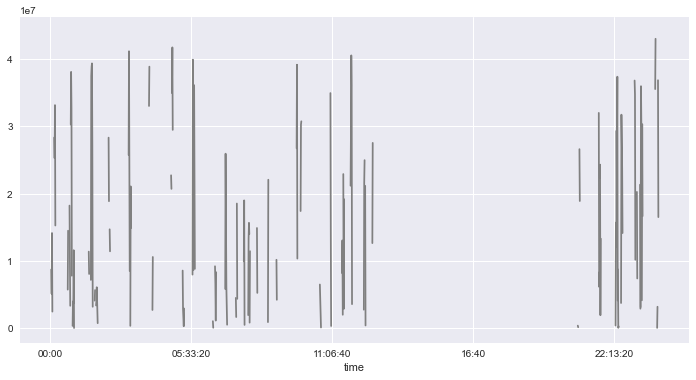

In [55]:
pivoted_count.plot(legend=False,figsize= (12, 6), color='grey')

---

### JJA 2020

##### Read in ECO3ETPTJPL-001-Statistics.csv

In [ ]:
# read in CSV file for each winter
#
ET_stats = pd.read_csv ("ECO3ETPTJPL-001-Statistics_S2020.csv", index_col='Date', parse_dates=True)
pd.set_option('display.max_columns', None)
ET_stats.head()

In [ ]:
ET_stats.dtypes

In [ ]:
mean = ET_stats['Mean']
mean

In [ ]:
mean.dtype

In [ ]:
plt.style.use('seaborn')
mean.plot(figsize= (12, 6))

In [ ]:
mean = pd.DataFrame(mean)
mean

In [ ]:
mean.to_csv('mean_S2020.csv')
print('new csv file was created... ')

In [ ]:
mean.resample('M').plot(figsize= (12, 6))

In [ ]:
mean.plot(figsize= (12, 6), kind='bar')

In [ ]:
mean

In [ ]:
mean.resample('D').mean().plot(figsize= (12, 6))

In [ ]:
mean.resample('D').sum().plot(figsize= (12, 6))

In [ ]:
mean.groupby(mean.index.time).mean().plot()

In [ ]:
pivoted = ET_stats.pivot_table('Count', index=ET_stats.index.time, columns=ET_stats.index.date)
pivoted

In [ ]:
pivoted.plot(legend=False)

In [ ]:
stdev = ET_stats['Standard Deviation']
stdev

In [ ]:
plt.style.use('seaborn')
stdev.plot(figsize= (12, 6))

In [ ]:
#define subplots
fig, ax = plt.subplots(figsize=(14,7))

#add mean to plot
ax.plot(mean, label='mean')
#add stdev to plot
ax.plot(stdev, label='stdev')